# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: David Büning

Datum: 19.11.2023

Gruppe: 13

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Inwiefern beeinflusst die Temperaturdifferenz zwischen einem heißen Getränk und der Umgebung den Transportkoeffizienten?  Und kann anhand dieser Auswertung das Newtonsche Abkühlungsgesetz bestätigt werden?

## Versuchsaufbau und Durchführung

Bei diesem Versuch habe ich heißes Wasser in eine Tasse gefüllt. Einen Sensor habe ich in die Tasse gelegt und den anderen daneben, um die Umgebungstemperatur zu messen. Dann habe ich für 10 Minuten gemessen.


![Versuchsaufbau Versuch 2](figures/Versuchsaufbau_Versuch2.jpeg)

## Versuchsauswertung

In [12]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path  = "/home/pi/calorimetry_home/data/Experiment Newton/data.h5"

# DONE #

In [4]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

#HDF5-Datei öffnen
import h5py
sensor_data = {}
with h5py.File(path, 'r') as file:
    #in Raw Data gehen
    raw_data_group = file['RawData']
    #Attribute der hdf5 Datei auslesen
    created_date = file.attrs.get('created')
    experiment = file.attrs.get('experiment')
    group_number = file.attrs.get('group_number')
    authors = file.attrs.get('authors')
    
    for sensor_uuid in raw_data_group:
        #Temperaturen auslesen und als Array laden
        temperature_dataset = raw_data_group[sensor_uuid]['temperatures']
        temperatures = temperature_dataset[()]
            
        #Zeitschritte auslesen und als Array laden
        timestamp_dataset = raw_data_group[sensor_uuid]['timestamps']
        timestamps = timestamp_dataset[()]

        #Attribute der Sensoren auslesen
        sensor_dataset = raw_data_group[sensor_uuid]
        sensor_name = sensor_dataset.attrs.get('name')
        sensor_serial = sensor_dataset.attrs.get('serial')
        #dict füllen mit uuids als keys
        sensor_data[sensor_uuid] = {'name': sensor_name, 'serial': sensor_serial, 'temperatures': temperatures, 'timestamps': timestamps}
file.close()
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

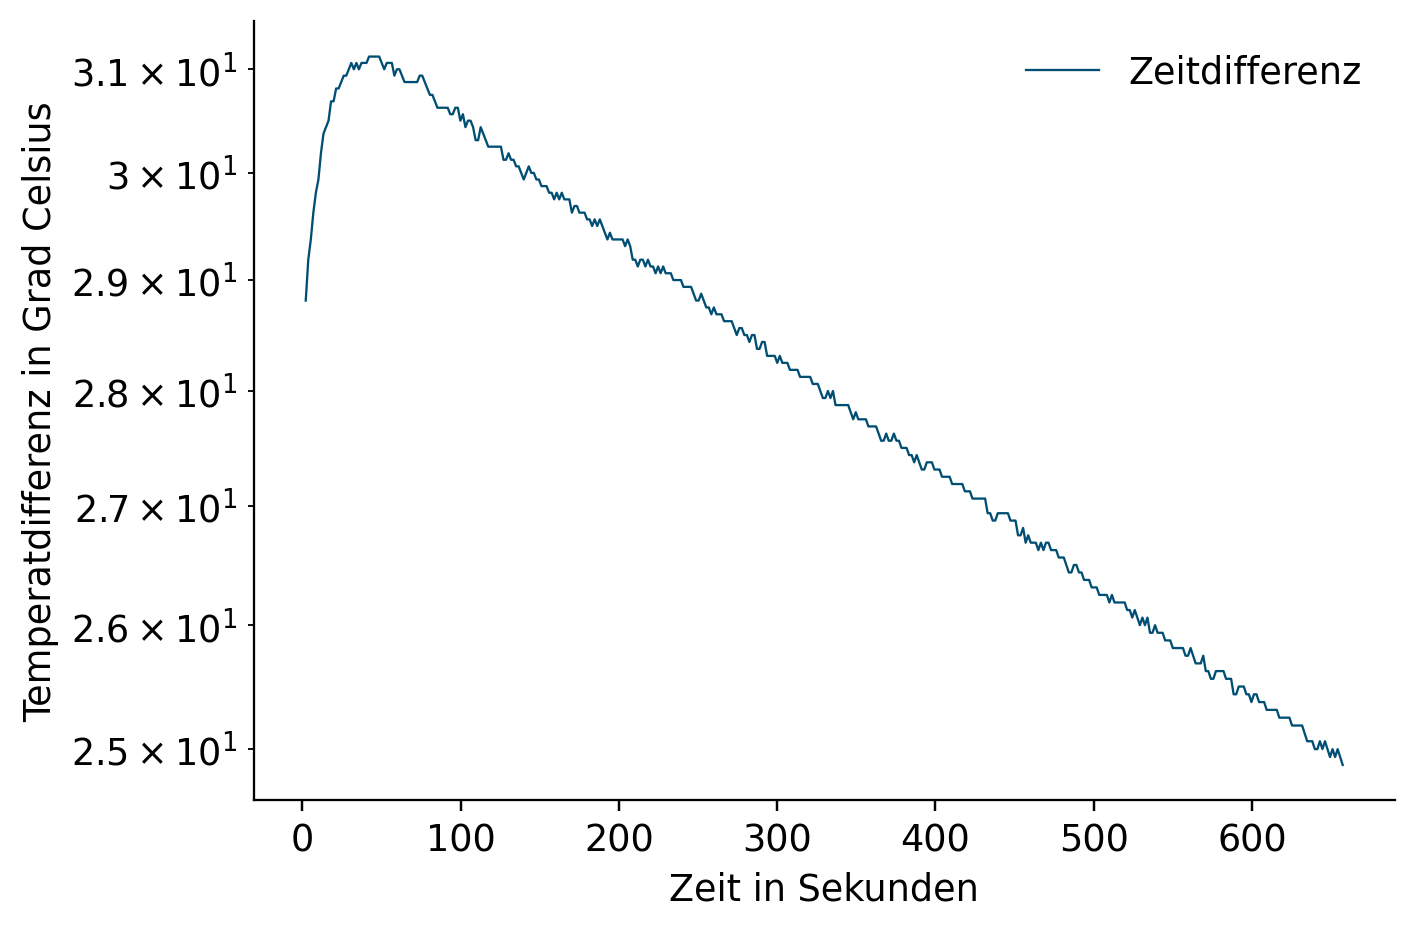

<Figure size 1471.8x1012 with 0 Axes>

In [21]:
# TODO: Use the temperature and time data for plotting

#uuids als Liste speichern
uuids = list(sensor_data.keys())
#Zeit als Array speichern
timestamps = sensor_data[uuids[0]]['timestamps']
#Temperaturen des kalten Sensors (Umgebung) als Array speichern
temperatures1 = sensor_data[uuids[0]]['temperatures']
#Temperaturen des warmen Sensors als Array speichern
temperatures2 = sensor_data[uuids[1]]['temperatures']

temperatures_diff = temperatures2 - temperatures1

plt.plot(timestamps, temperatures_diff, label = 'Zeitdifferenz')

#y-Achse auf logarithmisch umstellen
plt.yscale('log')
#Diagramm beschreiben und anzeigen lassen
plt.xlabel('Zeit in Sekunden')
plt.ylabel('Temperatdifferenz in Grad Celsius')
plt.legend()
plt.show()
plt.savefig('Temperaturdifferenzen_Versuch2.svg')



# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [37]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
#Anfangswert T_1 des Wassers
T_1 = temperatures2[0]
#Umgebungstemperatur T_2 (nach Skript)
T_2 = temperatures1[0]

#erstmal den natürlichen Logarithmus der Gleichung nehmen, hier der linken Seite
log_temperatures_diff = np.log(temperatures_diff)

#polyfit Funktion mit gegebenen Daten befüllen
coefficients = np.polyfit(timestamps, log_temperatures_diff - np.log(T_1 - T_2), 1)

#K aus coefficients auslesen
K = coefficients[0]

#jetzt berechne ich die vorausgesagte Temperatur für den letzten Zeitpunkt
t = timestamps[-1]
T_end_calc = (T_1 - T_2)* np.exp(K*t) + T_2

#die gemessene Temperatur bei t
T_end_exp = temperatures2[-1]

# DONE #

44.8382742738438
45.8125


#### (iV) Ergebnis

In [38]:
# TODO: Print result

print("Experiment Informationen: Autor:", authors,"Gruppe:" ,group_number, "durchgeführt am", created_date)
print("Der Transportkoeffizient beträgt", K, "1/s")
print("Die Temperatur [in Grad Celsius] am Ende der Messung mithilfe des Newtonschen Abkühlungsgesetzes beträgt:", T_end_calc, "und die Temperatur [in Grad Celsius] anhand der Messungen beträgt:",T_end_exp)



# DONE #

Experiment Informationen: Autor: David Buening Gruppe: 13 durchgeführt am 18-11-2023 18:49:54
Der Transportkoeffizient beträgt -0.0003493717063921567 1/s
Die Temperatur [in Grad Celsius] am Ende der Messung mithilfe des Newtonschen Abkühlungsgesetzes beträgt: 44.8382742738438 und die Temperatur [in Grad Celsius] anhand der Messungen beträgt: 45.8125


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Newtonsche Abkühlungsgesetz zeigt seine Geltung und kann bestätigt werden. Die Abweichungen von knapp einem Grad sind auf vernachlässigbare Terme zurückzuführen. Beispielsweise ist die Umgebungstemperatur als konstant angenommen und äußere Wärmequellen werden nicht beachtet. Dennoch ist der relative Fehler gering und das Gesetz somit eine gute Näherung.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der zweite Versuch war für mich sehr spannend, da ich zum ersten Mal eine Formel durch ein Experiment nachprüfen konnte. Die Analyse selbst gemessener Datenpunkte, ermöglichte es den Transportkoeffizienten auszurechnen und die Formel nachzuprüfen. Insgesamt konnte ich Verständnis für die Wärmeprozesse der Thermodynamik gewinnen, sowie Arbeiten mit dem Raspberry Pi erlernen und anwenden.